# Analyzing Customer Sentiment: A Study of Flipkart Product Reviews

## ___________________________________________________________________________________ ##

## Objective
Analyze customer sentiment towards products on Flipkart, one of India’s largest e-commerce platforms.

## Methodology
1. Scrape product review data from Flipkart using the BeautifulSoup library.
2. Perform sentiment analysis on the review text using the nltk library.
3. Merge the sentiment analysis results with the scraped data to create a new data frame.
4. Create visualizations and gain insights into customer sentiment using the VADER sentiment analysis tool.

## Outcome
Provide valuable insights into customer opinions and satisfaction with Flipkart products.


In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [2]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests

# Create a dictionary to store scraped data
rep = { 'Star': [], 'Review': [], 'Comment': []}

# Define the scraping function
def scraping_review(link, page):
    global rep  # To access the 'rep' dictionary defined outside the function
    
    # Loop through the specified number of pages to scrape data
    for x in range(1, page + 1):
        url = '{}&page={}'.format(link, x)  # Construct the URL for the current page
        response = requests.get(url)  # Send a request to the URL
        soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content using BeautifulSoup

        # Extract the relevant sections from the page using class names
        comment_cards = soup.find_all('div', class_="_1AtVbE col-12-12")  # Comment section
        review_cards = soup.find_all('div', class_="t-ZTKy")  # Review section
        star_cards = soup.find_all('div', class_="_3LWZlK _1BLPMq")  # Star rating section

        # Filter out None values from comment_cards to avoid errors
        comment_cards = [comment for comment in comment_cards if comment.p is not None]

        # Iterate through the extracted data and store it in the 'rep' dictionary
        for comment, review, star in zip(comment_cards, review_cards, star_cards):
            comment_text = comment.p.text  # Extract the comment text
            review_text = review.div.div.text  # Extract the review text
            star_text = star.text  # Extract the star rating text

            # Append the extracted data to the corresponding lists in the 'rep' dictionary
            rep['Star'].append(star_text)
            rep['Review'].append(review_text)
            rep['Comment'].append(comment_text)

# The function 'scraping_review' can be called with the URL of the product page and the number of pages to scrape.
# For example:
# scraping_review('https://www.flipkart.com/product-page-link', 5)


In [3]:

#scaping data from flipkart using function 
scraping_review('https://www.flipkart.com/casio-ct-s200rd-ks47a-digital-portable-keyboard/product-reviews/itmd83d3ddbb0114?pid=MKDFMQ8XXHJGYE68&lid=LSTMKDFMQ8XXHJGYE682MVA12&marketplace=FLIPKART',6)

In [4]:
import pandas as pd

# Create a DataFrame from the scraped data stored in the 'rep' dictionary
df = pd.DataFrame(rep)

# Generate a list of 'Id' values from 1 to the number of rows in the DataFrame
id = []
for x in range(1, len(df) + 1):
    id.append(x)

# Assign the 'Id' list as a new column in the DataFrame
df = df.assign(Id=id)

# Reorder the columns with the 'Id' column as the first column
cols = df.columns.tolist()  # Get the list of column names
cols = cols[-1:] + cols[:-1]  # Move the last column ('Id') to the front
df = df[cols]  # Reorder the DataFrame based on the new column order

# The DataFrame 'df' now contains the scraped data with a unique 'Id' assigned to each row.

In [5]:
df.head()

,Id,Star,Review,Comment
0,1,5,So amazing and too good quality products,Terrific purchase
1,2,5,awesome keyboard with midi support and nice bu...,Terrific
2,3,5,"I just got this product, very fast delivery. g...",Awesome
3,4,3,"Sound quality is not that good, but if you use...",Just okay
4,5,5,Good product,Highly recommended


In [6]:
df.shape

(49, 4)

In [7]:
# Assuming 'sia' is a pre-initialized instance of the VADER SentimentIntensityAnalyzer class

# Create an empty dictionary to store polarity scores
res = {}

# Iterate over each row in the DataFrame and calculate polarity scores
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']  # Get the review text from the 'Review' column
    myid = row['Id']  # Get the 'Id' associated with the review
    res[myid] = sia.polarity_scores(text)  # Calculate polarity scores and store them in the 'res' dictionary

# The dictionary 'res' now contains the polarity scores for each review text, indexed by the review's 'Id'.


  0%|          | 0/49 [00:00<?, ?it/s]

In [8]:
vaders = pd.DataFrame(res).T #transposing the dictionary 
vaders.head()

,neg,neu,pos,compound
1,0.000,0.417,0.583,0.7902
2,0.054,0.616,0.330,0.9172
3,0.000,0.731,0.269,0.9274
4,0.085,0.645,0.270,0.5785
5,0.000,0.256,0.744,0.4404


In [9]:

vaders = vaders.reset_index().rename(columns={'index':'Id'}) #merging the Both Dataframe for analysis
vaders = vaders.merge(df, how='left')

In [10]:
vaders.head()

,Id,neg,neu,pos,compound,Star,Review,Comment
0,1,0.000,0.417,0.583,0.7902,5,So amazing and too good quality products,Terrific purchase
1,2,0.054,0.616,0.330,0.9172,5,awesome keyboard with midi support and nice bu...,Terrific
2,3,0.000,0.731,0.269,0.9274,5,"I just got this product, very fast delivery. g...",Awesome
3,4,0.085,0.645,0.270,0.5785,3,"Sound quality is not that good, but if you use...",Just okay
4,5,0.000,0.256,0.744,0.4404,5,Good product,Highly recommended


# Categorical univariate analysis 

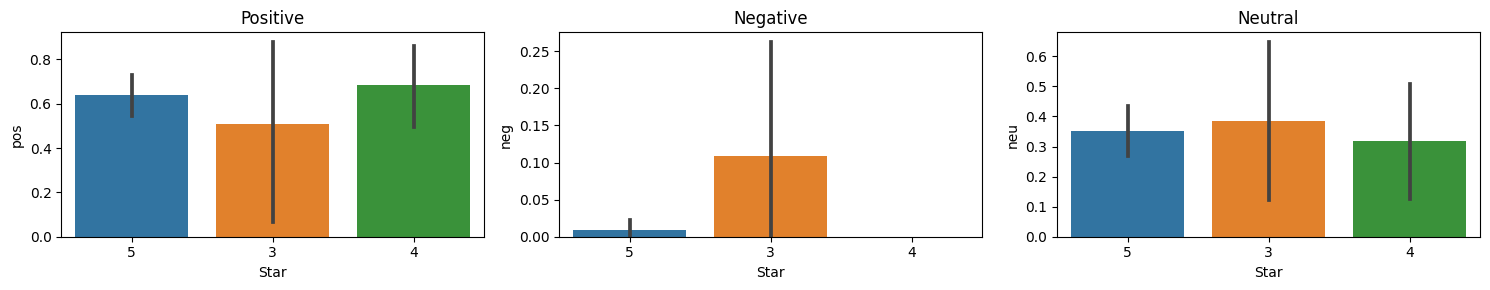

In [11]:
# Assuming 'vaders' is the DataFrame containing the sentiment analysis results,
# with columns 'Star', 'pos' (positive sentiment score), 'neg' (negative sentiment score), and 'neu' (neutral sentiment score)

# Create a figure with three subplots, arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# Plot the first subplot: Positive sentiment scores vs. Star ratings
sns.barplot(data=vaders, x='Star', y='pos', ax=axs[0])
axs[0].set_title('Positive')

# Plot the second subplot: Negative sentiment scores vs. Star ratings
sns.barplot(data=vaders, x='Star', y='neg', ax=axs[1])
axs[1].set_title('Negative')

# Plot the third subplot: Neutral sentiment scores vs. Star ratings
sns.barplot(data=vaders, x='Star', y='neu', ax=axs[2])
axs[2].set_title('Neutral')

# Set the titles for each subplot
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')

# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()

# Display the plots
plt.show()


# Correlation

In [12]:
def correlation(x, y):
    # Calculate the correlation coefficient between 'x' and 'y'
    correlation = np.corrcoef(x, y)[0, 1]

    # Create a scatter plot of 'x' and 'y'
    plt.scatter(x, y)

    # Set the title of the plot to include the correlation coefficient
    plt.title(f'Correlation: {correlation:.2f}')

    # Label the axes
    plt.xlabel('x')
    plt.ylabel('y')

    # Display the plot
    plt.show()

    # Return the correlation coefficient
    return correlation



In [13]:
print(vaders.dtypes)

Id            int64
neg         float64
neu         float64
pos         float64
compound    float64
Star         object
Review       object
Comment      object
dtype: object


In [14]:
vaders['Star'] = vaders['Star'].astype('float64') #changing the dataTypes from obj to the #float64 as obj is not allowed for following visualisation

In [15]:
compound = vaders['compound'].tolist()

In [16]:
star = vaders['Star'].tolist()

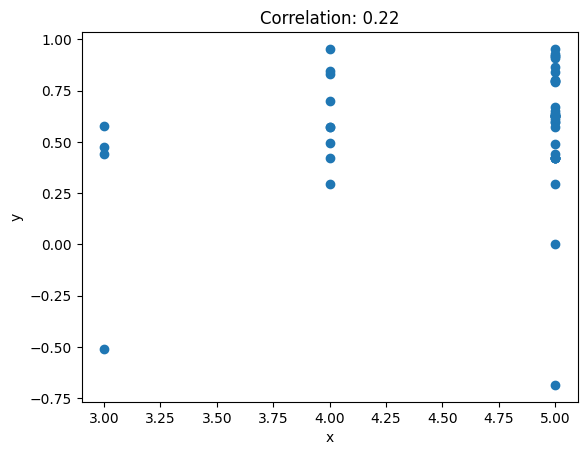

0.2153106783020806

In [17]:
correlation(star, compound)

The correlation coefficient between variables star and compound is 0.22, indicating a weak positive linear relationship. As star increases, compound tends to increase slightly, but the association is not strong. Correlation does not imply causation, and other analysis methods may be needed to fully understand the relationship. Visualizations and domain-specific knowledge can provide additional insights.